In [53]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

In [54]:
from tensorflow.keras.datasets import fashion_mnist

In [55]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train),type(y_train))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [56]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [57]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [58]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

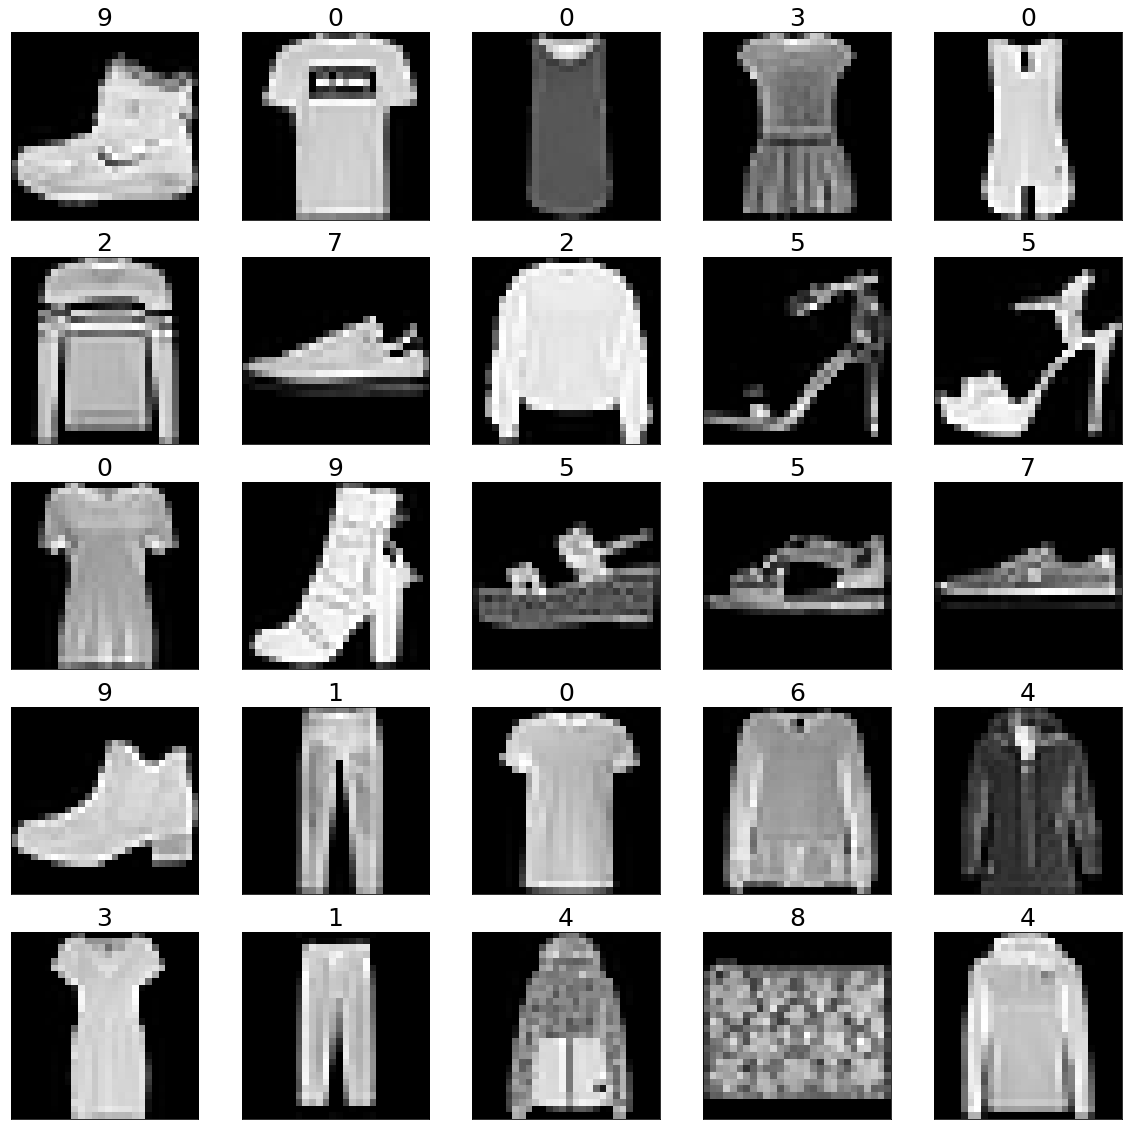

In [62]:
plt.figure(figsize=(20,20))
for i in range(25):  # i=0,1,2..,24
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontdict={'size':25})
plt.show()

Normalising

In [32]:
x_train=x_train/255
x_test=x_test/255

Reshaping

In [34]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [37]:
m1 = Sequential()
m1.add(Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1))) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2))) # stride = 2

m1.add(Conv2D(32, (3,3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride = 2

m1.add(Flatten())
m1.add(Dense(16,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [38]:
m1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [39]:
h1 = m1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))


Epoch 1/25
1875/1875 [==============================] - 99s 53ms/step - loss: 0.5313 - accuracy: 0.8103 - val_loss: 0.3946 - val_accuracy: 0.8635
Epoch 2/25
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3583 - accuracy: 0.8719 - val_loss: 0.3855 - val_accuracy: 0.8552
Epoch 3/25
1875/1875 [==============================] - 97s 52ms/step - loss: 0.3181 - accuracy: 0.8852 - val_loss: 0.3318 - val_accuracy: 0.8804
Epoch 4/25
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2909 - accuracy: 0.8942 - val_loss: 0.3085 - val_accuracy: 0.8933
Epoch 5/25
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2695 - accuracy: 0.9019 - val_loss: 0.2898 - val_accuracy: 0.8956
Epoch 6/25
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2523 - accuracy: 0.9081 - val_loss: 0.2968 - val_accuracy: 0.8923
Epoch 7/25
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2387 - accuracy: 0.9125 - val_loss: 0.2856 -

In [40]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.146562,0.946267,0.308748,0.9041,20
21,0.143410,0.947617,0.315790,0.9036,21
22,0.139269,0.948483,0.324349,0.9022,22
23,0.135545,0.950350,0.331084,0.9028,23
24,0.132452,0.951000,0.325810,0.8957,24


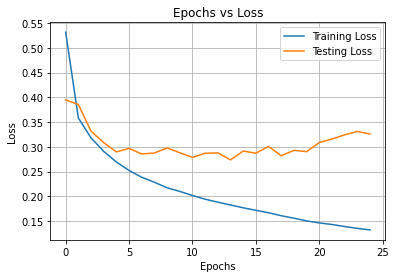

In [41]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.grid()
plt.legend()
plt.show()

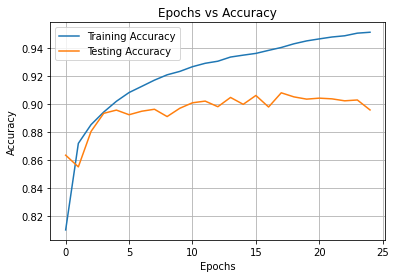

In [42]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.grid()
plt.legend()
plt.show()

In [43]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1[:5])

313/313 [==============================] - 5s 15ms/step
[[8.8694866e-14 3.8801119e-07 1.0765744e-13 6.9422511e-13 2.2888073e-11
  1.2183311e-08 8.0781568e-08 4.5409272e-04 2.8075000e-15 9.9954540e-01]
 [1.7016989e-04 1.4170873e-10 9.9535173e-01 5.3264779e-07 3.7676566e-03
  2.8102078e-16 7.0996763e-04 4.5224732e-14 6.4437572e-08 4.1773847e-09]
 [1.4459188e-09 9.9999994e-01 5.2900197e-13 1.3011346e-08 3.5439798e-09
  2.4652389e-18 2.2949465e-11 8.5475222e-22 2.3486125e-11 1.3175775e-15]
 [8.8931590e-10 9.9999994e-01 2.6190142e-13 6.3681888e-10 1.8274630e-10
  1.7611195e-20 6.1281826e-12 6.7156237e-25 5.3558842e-15 2.3043083e-17]
 [1.2662518e-02 7.1953759e-09 1.2876816e-03 2.9511778e-02 2.5191322e-02
  1.3674513e-07 9.3134642e-01 6.1436529e-11 2.0851349e-08 4.9958000e-08]]


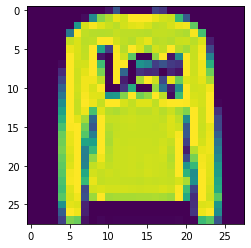

In [63]:
plt.imshow(x_test[1])
plt.show()

In [45]:
ypred = [np.argmax(i) for i in ypred_m1]
print(ypred[:5])

[9, 2, 1, 1, 6]


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[802   5  18  28   4   1 135   0   6   1]
 [  0 981   2  14   1   0   1   0   1   0]
 [ 14   0 836  16  71   0  61   0   2   0]
 [ 14   9   9 924  24   0  17   0   3   0]
 [  0   1  55  27 873   1  41   0   2   0]
 [  1   0   0   0   0 975   1  10   1  12]
 [ 97   0  64  33  84   2 711   0   9   0]
 [  0   0   0   0   0  18   0 910   1  71]
 [  1   1   5   4   4   1  16   3 964   1]
 [  0   0   0   0   0   7   0  12   0 981]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.82      0.87      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.71      0.72      1000
           7       0.97      0.91      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.92     